In [1]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pyfasttext import FastText
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import random
from collections import Counter
from matplotlib.font_manager import FontProperties
import math

In [2]:
mpl.rcParams['font.sans-serif'] = ['Source Han Sans TW',
                                   'sans-serif',
                                   "Arial Unicode MS"  # fc-list :lang=hi family
                                   ]


In [273]:
#VISUALIZING INITIAL EMBS

# PATH to tokenized data
PATH = "../../data/crawled_cleaned/"
# PATH = "../../data/crawled_nep_splits/"
lang = "bhojpuri"
anchor = "hindi-urdu"
LANG_PATH = PATH + lang + ".txt"
ANCH_PATH = PATH + anchor + ".txt"

MODEL_PATH = "../models/joint/{}_{}.bin".format(lang, anchor)
VIS_PATH = "visualizations/joint/{}_{}".format(lang, anchor)

In [275]:
#VISUALIZING UPSAMPLED LRLS EMBS

# PATH to tokenized data
PATH = "../../data/upsampled/"
lang = "bhojpuri"
anchor = "hindi-urdu"
LANG_PATH = PATH + lang + ".txt"
ANCH_PATH = PATH + anchor + ".txt"

MODEL_PATH = "../models/upsampled/{}_{}.bin".format(lang, anchor)
VIS_PATH = "visualizations/upsampled/{}_{}.png".format(lang, anchor)

In [261]:
# Get lexicons of lang and anchor

lang_data = open(LANG_PATH, "r").read()
lang_lexicon = Counter(lang_data.split())
lang_total = len(lang_data)

anch_data = open(ANCH_PATH, "r").read()
anch_lexicon = Counter(anch_data.split())
anch_total = len(anch_data)

In [276]:
# Get model
model = FastText(MODEL_PATH)

In [277]:
len(model.words)

84167

In [264]:
# Get words


# l_words = [word for word in lang_lexicon if lang_lexicon[word]>2 and word not in anch_lexicon]
l_words = random.choices(list(lang_lexicon.keys()), weights=list(lang_lexicon.values()), k = min(100, len(lang_lexicon.keys())))

a_words = random.choices(list(anch_lexicon.keys()), weights=list(anch_lexicon.values()), k = 100)

# all_words = random.choices(list(lang_lexicon.keys())+list(anch_lexicon.keys()), k = 200)

plot_words = l_words + a_words
plot_words = np.asarray(plot_words)


# good_word_ids = [idx for idx,word in enumerate(model.words) if anch_lexicon[word] > 5 or lang_lexicon[word]]
# ids = random.sample(good_word_ids, k = 100)
# plot_words = np.asarray(model.words)[ids]
# plot_embs = model.numpy_normalized_vectors[ids]

In [265]:
# # Plot words from eval data that are in lexicon
# import json

# EVAL_PATH = "../evaluation_languages_home/eval_data/lexicons/hindi-urdu_target/rajasthani_hindi-urdu.json"
# with open(EVAL_PATH, "r") as f:
#     eval_data = json.load(f)
    
# l_words = list(eval_data.keys())
# a_words = [target for key, tar_dict in eval_data.items() for target in tar_dict]

# plot_words = l_words + a_words
# plot_words = np.asarray(plot_words)



In [278]:
# Get embeddings

plot_embs = np.asarray([model.get_numpy_vector(word) for word in plot_words])

In [279]:
#     if anch_lexicon[word] >= math.log(sum(anch_lexicon.values()), 100) - 1 and \
#         lang_lexicon[word] >= math.log(sum(lang_lexicon.values()), 100) - 1 :
    

In [280]:
plot_embs.shape

(200, 150)

In [281]:
# Getting colour labels
threshold_anch = math.log(sum(anch_lexicon.values()), 100) - 1
threshold_lang = math.log(sum(lang_lexicon.values()), 100) - 1

def get_colour(word):
    
    if word in lang_lexicon and word in anch_lexicon:
#         if anch_lexicon[word] >= threshold_anch and \
#         lang_lexicon[word] >= threshold_lang:
        if anch_lexicon[word]/anch_total < 0.5*lang_lexicon[word]/lang_total:
            return 2
        return 1
    if word in lang_lexicon and word not in anch_lexicon:
        return 2
    if word not in lang_lexicon and word in anch_lexicon:
        return 3
    return 0

colours = [get_colour(word) for word in plot_words]
colours = np.asarray(colours)
cdict = {1: "red", 2: "green", 3:"blue"}
mdict = {1:"^", 2: "s", 3:"x"}
ldict = {1: "Both", 2: lang, 3: anchor}

In [282]:
pca = PCA(n_components = 50)
pca_out = pca.fit_transform(plot_embs)

In [283]:
tsne_out = TSNE(n_components=2, init='random').fit_transform(pca_out)


In [284]:
size = 30

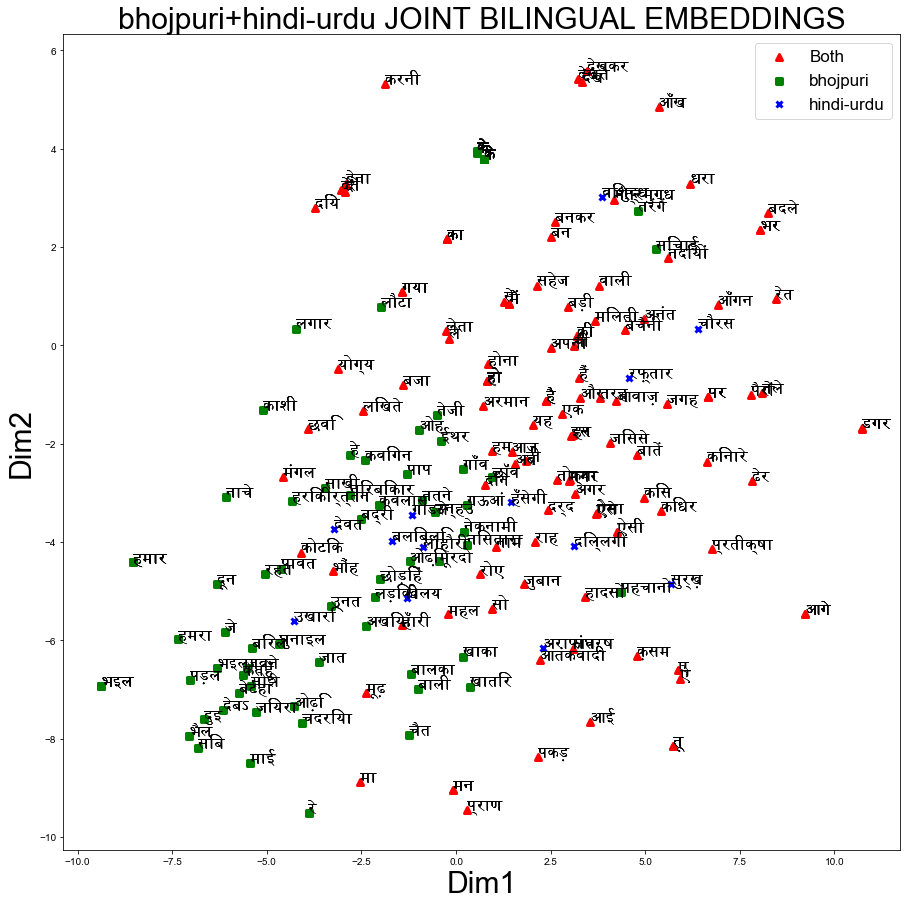

In [274]:
# Plotting TSNE


fig, ax = plt.subplots(figsize=(15,15))
for key in cdict:
    ix = np.where(colours==key)
    ax.scatter(tsne_out[ix][:,0], tsne_out[ix][:,1],linewidths=3,c=cdict[key], marker = mdict[key], label=ldict[key])
    for i, word in enumerate(plot_words):
        ax.annotate(word, xy=(tsne_out[i,0], tsne_out[i,1]), size=17)
    
plt.xlabel("Dim1",size=size)
plt.ylabel("Dim2",size=size)
plt.title("{}+{} JOINT BILINGUAL EMBEDDINGS".format(lang, anchor),size=size)

ax.legend(prop={'size': 17})

plt.savefig(VIS_PATH, dpi=fig.dpi)

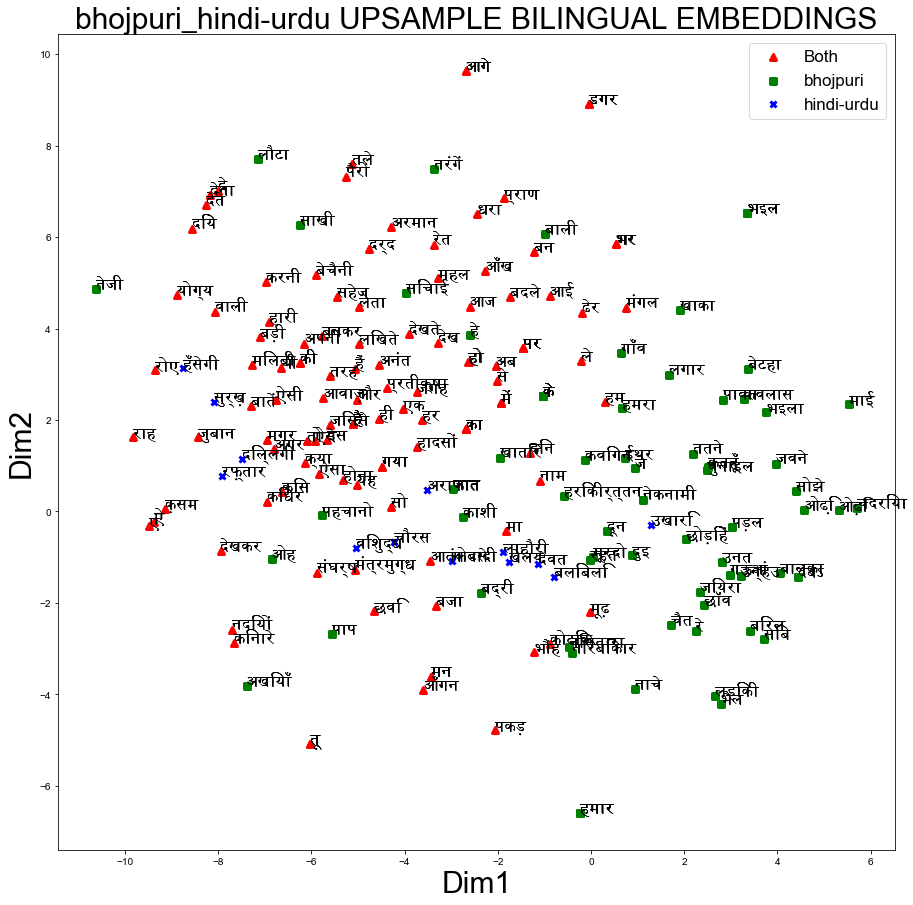

In [285]:
# Plotting TSNE

fig, ax = plt.subplots(figsize=(15,15))
for key in cdict:
    ix = np.where(colours==key)
    ax.scatter(tsne_out[ix][:,0], tsne_out[ix][:,1],linewidths=3,c=cdict[key], marker = mdict[key], label=ldict[key])
    for i, word in enumerate(plot_words):
        ax.annotate(word, xy=(tsne_out[i,0], tsne_out[i,1]), size=17)
    
plt.xlabel("Dim1",size=size)
plt.ylabel("Dim2",size=size)
plt.title("{}_{} UPSAMPLE BILINGUAL EMBEDDINGS".format(lang, anchor),size=size)

ax.legend(prop={'size': 17})

plt.savefig(VIS_PATH, dpi=fig.dpi)